Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [4]:

df = pd.read_csv(r"C:\Users\Lenovo\Desktop\AI\Week4\diabetes_.csv")

print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isna().sum())

print("\nSummary statistics:")
print(df.describe(include='all'))



First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                    

2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.


In [6]:
df_handle = df.copy()
for col in df_handle.columns:
    if df_handle[col].isna().any():
        median_value = df_handle[col].median() if np.issubdtype(df_handle[col].dtype, np.number) else df_handle[col].mode().iloc[0]
        df_handle[col] = df_handle[col].fillna(median_value)

print("Any remaining NaNs?", df_handle.isna().any().any())

Any remaining NaNs? False


3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.


In [24]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

np.random.seed(42)
indices = np.random.permutation(len(X))

train_size = int(0.7 * len(X))
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = X[train_idx]
X_test  = X[test_idx]
y_train = y[train_idx]
y_test  = y[test_idx]
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 537 Test size: 231


4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [25]:
def euclidean_distance(a: np.ndarray, b: np.ndarray):
  return np.sqrt(np.sum(a - b) ** 2)

def knn_predict_one(x_query: np.ndarray, X_train: np.ndarray, y_train: np.ndarray, k: int = 5):
   dists = np.sqrt(np.sum((X_train - x_query) ** 2, axis=1))
   nn_idx = np.argpartition(dists, k)[:k]
   nn_labels = y_train[nn_idx]
   values, counts = np.unique(nn_labels, return_counts=True)
   return values[np.argmax(counts)]

def knn_predict(X_query: np.ndarray, X_train: np.ndarray, y_train: np.ndarray, k: int = 5):
    preds = np.zeros(X_query.shape[0], dtype=y_train.dtype)
    for i in range(X_query.shape[0]):
        preds[i] = knn_predict_one(X_query[i], X_train, y_train, k)
    return preds

def accuracy_score(y_true: np.ndarray, y_pred: np.ndarray):
    return (y_true == y_pred).mean()

k_baseline = 5
t0 = time.time()
y_pred_baseline = knn_predict(X_test, X_train, y_train, k=k_baseline)
t1 = time.time()

acc_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline (unscaled) KNN | k={k_baseline}: Accuracy={acc_baseline:.4f}, Time={t1 - t0:.4f}s")

Baseline (unscaled) KNN | k=5: Accuracy=0.7143, Time=0.0428s


Problem - 2 - Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.


In [26]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_std[X_std == 0] = 1.0

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

k_scaled = 3
t0 = time.time()
y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k_scaled)
t1 = time.time()

acc_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Scaled KNN | k={k_scaled}: Accuracy={acc_scaled:.4f}, Time={t1 - t0:.4f}s")

Scaled KNN | k=3: Accuracy=0.6970, Time=0.0292s


2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

In [27]:
print("Comparison at k=3")
print(f"- Unscaled accuracy: {acc_baseline:.4f}")
print(f"- Scaled accuracy:   {acc_scaled:.4f}")
print("Observation: Scaling changes feature magnitudes, which can impact neighbor selection and thus accuracy.")

Comparison at k=3
- Unscaled accuracy: 0.7143
- Scaled accuracy:   0.6970
Observation: Scaling changes feature magnitudes, which can impact neighbor selection and thus accuracy.


Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.



In [29]:
ks = list(range(1, 16))
acc_unscaled_list, time_unscaled_list = [], []
acc_scaled_list, time_scaled_list = [], []

for k in ks:
    t0 = time.time()
    y_pred_u = knn_predict(X_test, X_train, y_train, k=k)
    t1 = time.time()
    acc_unscaled_list.append(accuracy_score(y_test, y_pred_u))
    time_unscaled_list.append(t1 - t0)

    t0 = time.time()
    y_pred_s = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)
    t1 = time.time()
    acc_scaled_list.append(accuracy_score(y_test, y_pred_s))
    time_scaled_list.append(t1 - t0)

best_k_unscaled = ks[int(np.argmax(acc_unscaled_list))]
best_k_scaled = ks[int(np.argmax(acc_scaled_list))]

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.


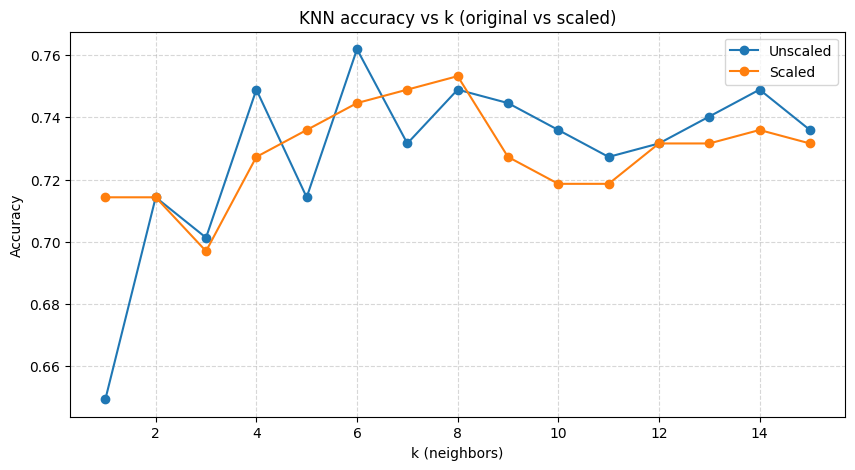

Best k (unscaled): 6 with accuracy 0.7619
Best k (scaled):   8 with accuracy 0.7532


In [30]:
plt.figure(figsize=(10, 5))
plt.plot(ks, acc_unscaled_list, marker='o', label='Unscaled')
plt.plot(ks, acc_scaled_list, marker='o', label='Scaled')
plt.xlabel('k (neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN accuracy vs k (original vs scaled)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

print(f"Best k (unscaled): {best_k_unscaled} with accuracy {max(acc_unscaled_list):.4f}")
print(f"Best k (scaled):   {best_k_scaled} with accuracy {max(acc_scaled_list):.4f}")

3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

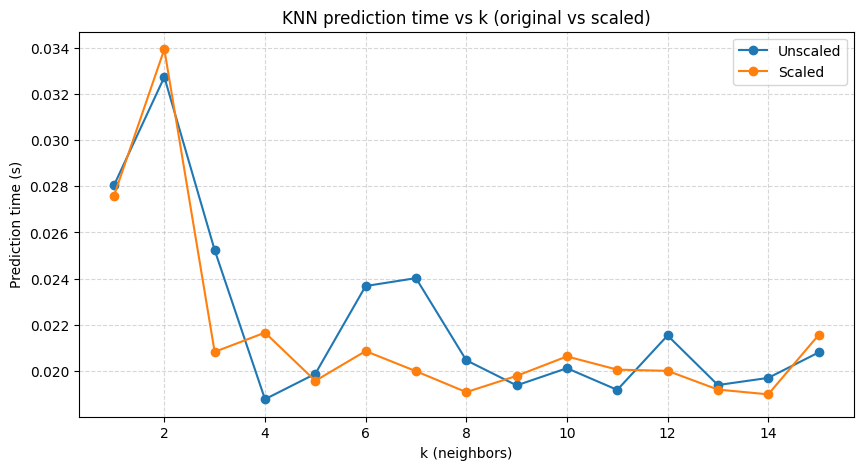

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(ks, time_unscaled_list, marker='o', label='Unscaled')
plt.plot(ks, time_scaled_list, marker='o', label='Scaled')
plt.xlabel('k (neighbors)')
plt.ylabel('Prediction time (s)')
plt.title('KNN prediction time vs k (original vs scaled)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()